<a href="https://colab.research.google.com/github/Slrosales/Soluciones_Computacionales/blob/main/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# np.random.seed(10)

In [347]:
f = lambda x: np.sin(x)/(x**2+1)

In [348]:
n = 10  # Número de elementos en el conjunto de datos

""""
Genera un conjunto de datos X de longitud n
Los valores se obtienen al dividir el intervalo de 0 a 50 en n partes iguales
usando linspace y luego añadiendo valores aleatorios (n)*50
"""
X = np.linspace(0, 50, n) + 50 * np.random.random(n)

X.sort()

X


array([14.32366415, 20.19545437, 23.75661237, 39.2076144 , 52.53020932,
       60.35808472, 60.92758013, 65.60762395, 75.98984929, 82.18736963])

In [349]:
# Se calcula el valor de la función f para cada elemento en el conjunto de datos X
Y = f(X)
Y = f(X)
Y

array([ 4.76632077e-03,  2.38425261e-03, -1.73532473e-03,  6.48833927e-04,
        2.78485638e-04, -1.69940296e-04, -2.54475301e-04,  8.30863814e-05,
        9.65657007e-05,  7.17384386e-05])

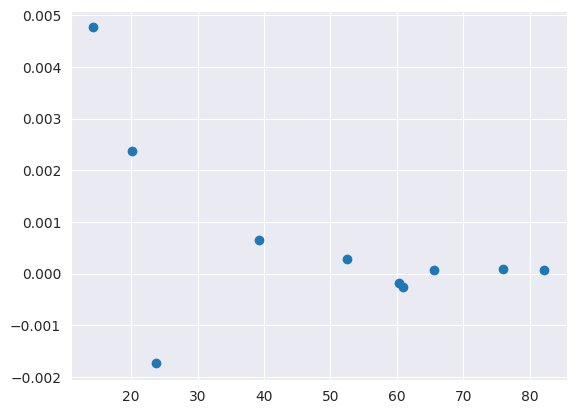

In [350]:
# Se crea un gráfico de dispersión que representa los puntos (X, Y)
# 'o' indica que se deben mostrar los puntos como círculos en el gráfico
plt.plot(X, Y, 'o')


In [351]:
"""
Genera una matriz de Vandermonde basada en el conjunto de datos X
La opción 'increasing = True' indica que las potencias de X
deben estar en orden creciente en las columnas de la matriz

La matriz A contendrá las potencias crecientes de los valores en X como columnas
"""
A = np.vander(X, increasing=True)
A

array([[1.00000000e+00, 1.43236641e+01, 2.05167355e+02, 2.93874828e+03,
        4.20936434e+04, 6.02935210e+05, 8.63624146e+06, 1.23702622e+08,
        1.77187481e+09, 2.53797397e+10],
       [1.00000000e+00, 2.01954544e+01, 4.07856377e+02, 8.23684486e+03,
        1.66346824e+05, 3.35944970e+06, 6.78456132e+07, 1.37017299e+09,
        2.76712660e+10, 5.58833790e+11],
       [1.00000000e+00, 2.37566124e+01, 5.64376631e+02, 1.34076769e+04,
        3.18520982e+05, 7.56697950e+06, 1.79765799e+08, 4.27062640e+09,
        1.01455616e+11, 2.41024174e+12],
       [1.00000000e+00, 3.92076144e+01, 1.53723703e+03, 6.02713966e+04,
        2.36309768e+06, 9.26514226e+07, 3.63264125e+09, 1.42427197e+11,
        5.58423064e+12, 2.18944362e+14],
       [1.00000000e+00, 5.25302093e+01, 2.75942289e+03, 1.44953062e+05,
        7.61441469e+06, 3.99986798e+08, 2.10113902e+10, 1.10373273e+12,
        5.79793111e+13, 3.04566535e+15],
       [1.00000000e+00, 6.03580847e+01, 3.64309839e+03, 2.19890441e+05,
   

In [352]:
"""
Se resuelve el sistema de ecuaciones lineales A * theta = Y

Donde A es la matriz de Vandermonde generada anteriormente
y Y son los valores de la función f evaluados en X
El vector theta contiene los coeficientes que se ajustan mejor a los datos
"""
theta = np.linalg.solve(A, Y)
theta

array([-3.89527001e+00,  1.00017076e+00, -1.07836366e-01,  6.44270618e-03,
       -2.36214061e-04,  5.53661202e-06, -8.33055355e-08,  7.78735135e-10,
       -4.11703472e-12,  9.40520876e-15])

In [353]:
"""
Define una función lambda P que evalúa un polinomio en x utilizando
los coeficientes en el vector theta

El polinomio se construye sumando términos coef*x^i
para cada i en el rango de coeficientes en theta
"""
P = lambda x: sum([coef * x**i for i, coef in enumerate(theta)])


-0.11889276277267868

In [354]:
# El arreglo x1 contendrá 100 valores distribuidos uniformemente desde 0 hasta 100
x1 = np.linspace(0, 100, 100)
x1

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [362]:
# El arreglo y1 contendrá los valores del polinomio P evaluado en cada valor de x en x1
y1 = np.array([P(x) for x in x1])
y1

array([-3.89527001e+00, -2.98862265e+00, -2.26546091e+00, -1.69397083e+00,
       -1.24697405e+00, -9.01374983e-01, -6.37659879e-01, -4.39444197e-01,
       -2.93064835e-01, -1.87213954e-01, -1.12611259e-01, -6.17117846e-02,
       -2.84463522e-02, -7.99203807e-03,  3.42988184e-03,  8.73089861e-03,
        1.01094049e-02,  9.18412050e-03,  7.10880500e-03,  4.67013052e-03,
        2.37046622e-03,  4.97210690e-04, -8.19804473e-04, -1.56142581e-03,
       -1.78149452e-03, -1.57716086e-03, -1.06608618e-03, -3.69516837e-04,
        3.99696003e-04,  1.14496989e-03,  1.79051450e-03,  2.28318244e-03,
        2.59224971e-03,  2.70765647e-03,  2.63717096e-03,  2.40287542e-03,
        2.03731242e-03,  1.57957342e-03,  1.07155856e-03,  5.54587473e-04,
        6.64956317e-05, -3.60691119e-04, -7.02448879e-04, -9.42794275e-04,
       -1.07467909e-03, -1.09977744e-03, -1.02772504e-03, -8.74889224e-04,
       -6.62764097e-04, -4.16096699e-04, -1.60858381e-04,  7.78203304e-05,
        2.77632395e-04,  

(5.0, 90.0, -0.01, 0.01)

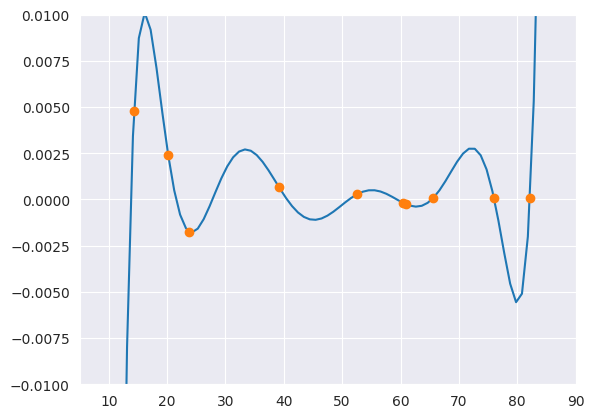

In [364]:
plt.plot(x1, y1)
plt.plot(X, Y, 'o')
plt.axis([5, 90, -0.01, 0.01])

In [357]:
f(20)

0.002276671448198573

In [358]:
P(20)

0.0028028833902391257

In [359]:
# Evaluación de error absoluto
z = 20
abs(f(z)-P(z))

0.0005262119420405527